<a href="https://colab.research.google.com/github/SpaceDreams/skywatertests/blob/main/Small_QA_of_sky130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKY130 plots of ID-VG derivatives


Charles White, August 2022<br>
Based on: 
[Professor Murmann's Code](https://github.com/google/skywater-pdk-sky130-raw-data/blob/main/notebooks/sky130_gm.ipynb)
which was Based on:
[sky130-raw-data-viz.ipynb](https://colab.research.google.com/github/proppy/skywater-pdk-sky130-raw-data/blob/notebooks/notebooks/sky130-raw-data-viz.ipynb)<br>
SPDX-License-Identifier: Apache-2.0


## Get data

In [1]:
!git clone https://github.com/google/skywater-pdk-sky130-raw-data

Cloning into 'skywater-pdk-sky130-raw-data'...
remote: Enumerating objects: 1525, done.
remote: Counting objects: 100% (1525/1525), done.
remote: Compressing objects: 100% (1484/1484), done.
remote: Total 1525 (delta 48), reused 1496 (delta 34), pack-reused 0
Receiving objects: 100% (1525/1525), 14.58 MiB | 14.79 MiB/s, done.
Resolving deltas: 100% (48/48), done.


## Install DeviceModelingToolkit

[DeviceModelingToolkit](https://dmt-development.gitlab.io/dmt-core/index.html) (DMT) is a Python tool targeted at helping modeling engineers extract model parameters, run circuit and TCAD simulations and automate their infrastructure.


In [2]:
!python3 -m pip install DMT-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 242 kB 26.7 MB/s 
     |████████████████████████████████| 209 kB 59.9 MB/s 
     |████████████████████████████████| 22.0 MB 1.4 MB/s 
     |████████████████████████████████| 30.9 MB 1.4 MB/s 
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39408 sha256=0821a91d7548cad91828b857130a612ab24afd925dbfc04b7513e8542125bcad
  Stored in directory: /root/.cache/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59
  Created wheel for scikit-rf: filename=scikit_rf-0.23.1-py3-none-any.whl size=3408203 sha256=6fb24ceba2ba6d047534d175a795605894346060513861858cbb02b57cd68da3
  Stored in directory: /root/.cache/pip/wheels/25/e7/c7/9b465c754ec65d763f881bc4272b62e17375538f03c027882d
Successfully built colormath scikit-rf


## Read measurement data

In [7]:
import pathlib
import pandas as pd
import DMT.core
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False # I was having issues with latex, so I just removed it.

cells_dir = pathlib.Path('skywater-pdk-sky130-raw-data/sky130_fd_pr/cells')

# 5V device
#cell_dir = cells_dir / 'nfet_g5v0d10v5'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_g5v0d10v5_w0p420u_l0p500u_m1(2618_1_10_IDVD_D3).mdm'

# 1.8V device, regular Vt, long channel
#cell_dir = cells_dir / 'nfet_01v8'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_01v8_w7u_l8u_m1(8392_5_6_IDVG).mdm'

# 1.8V device, regular Vt, short channel
#cell_dir = cells_dir / 'nfet_01v8'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_6_7_IDVG).mdm'

# 1.8V device, regular Vt, short channel pfet
cell_dir = cells_dir / 'pfet_01v8'
mdm_path = cell_dir / 'sky130_fd_pr__pfet_01v8_w1u_l0p5u_m1(8405_11_10_IDVG).mdm'
#cell_dir = cells_dir / 'pfet_01v8'
#mdm_path = cell_dir / 'sky130_fd_pr__pfet_01v8_w1u_l0p5u_m1(8405_9_8_IDVG).mdm'

measurement = DMT.core.DutMeas(
    database_dir=None,
    dut_type=DMT.core.DutType.device,
    name=mdm_path.stem,
    reference_node='E')

measurement.add_data(pathlib.Path(mdm_path),
                     key=mdm_path.stem)
df = measurement.data[mdm_path.stem]
df = df[np.isclose(df["VD"], -1.8)]
df = df[np.isclose(df["VB"], 0)]
df

,VG,IG,ID,IB,VS,VB,VD
37,0.00,2.606900e-09,2.355400e-09,-1.539500e-08,0.0,0.0,-1.8
38,-0.05,2.809000e-10,2.179000e-09,1.017100e-08,0.0,0.0,-1.8
39,-0.10,4.524000e-10,2.261800e-09,1.067900e-08,0.0,0.0,-1.8
40,-0.15,6.157000e-10,2.327700e-09,1.075600e-08,0.0,0.0,-1.8
41,-0.20,7.688000e-10,2.356700e-09,1.032800e-08,0.0,0.0,-1.8
42,-0.25,9.085000e-10,2.352600e-09,9.859000e-09,0.0,0.0,-1.8
43,-0.30,-1.284600e-09,-6.873000e-10,9.792000e-09,0.0,0.0,-1.8
44,-0.35,-2.636600e-09,-7.454900e-09,8.967000e-09,0.0,0.0,-1.8
45,-0.40,2.031700e-09,-1.543100e-08,8.230000e-10,0.0,0.0,-1.8
46,-0.45,1.430700e-09,9.290000e-10,-7.968000e-09,0.0,0.0,-1.8


# Compute quantities of interest

# Plots

**comments:** 
*   From the log plot, we see that the data gets noisy below 2nA.


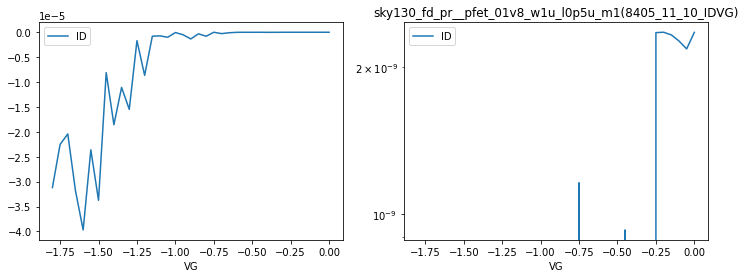

In [8]:
# plot ID-VG on linear and log scales

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="VG", y="ID", ax=axes[0], logy=False)
df.plot(x="VG", y="ID", ax=axes[1], logy=True, title = mdm_path.stem)
plt.show()

**comments:**
*   Looks noisy

For comparison, refer to [data](https://www.mos-ak.org/munich_2007/papers/02_MOS-AK_Assenmacher.pdf) collected by Infineon for PSP modeling. Key points:

*   Their ID looks noise free down to several tens of pA, see p. 12 (instead of 200nA)
*   Their VG step size is also 50mV, so should be OK for us as well




